In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/teen-pregnancy-females-aged-15-to-19/13100166.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/kaggle/input/teen-pregnancy-females-aged-15-to-19/13100166.csv')
df.head()

,REF_DATE,GEO,DGUID,Age group,Teen pregnancy outcomes,Characteristics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1998,Canada,NaN,15 to 19 years,"Total, teen pregnancies",Number of events,Number,223,units,0,v4384837,1.1.1.1,41588.0,NaN,NaN,NaN,0
1,1998,Canada,NaN,15 to 19 years,"Total, teen pregnancies","Rate per 1,000 females","Rates per 1,000 females",266,units,0,v4384838,1.1.1.2,41.7,NaN,NaN,NaN,1
2,1998,Canada,NaN,15 to 19 years,Live births,Number of events,Number,223,units,0,v4384839,1.1.2.1,19721.0,NaN,NaN,NaN,0
3,1998,Canada,NaN,15 to 19 years,Live births,"Rate per 1,000 females","Rates per 1,000 females",266,units,0,v4384840,1.1.2.2,19.8,NaN,NaN,NaN,1
4,1998,Canada,NaN,15 to 19 years,Induced abortions,Number of events,Number,223,units,0,v4384841,1.1.3.1,20859.0,NaN,NaN,NaN,0


In [4]:
df.columns

Index(['REF_DATE', 'GEO', 'DGUID', 'Age group', 'Teen pregnancy outcomes',
       'Characteristics', 'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID',
       'VECTOR', 'COORDINATE', 'VALUE', 'STATUS', 'SYMBOL', 'TERMINATED',
       'DECIMALS'],
      dtype='object')

In [5]:
# Basic dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   REF_DATE                 960 non-null    int64  
 1   GEO                      960 non-null    object 
 2   DGUID                    0 non-null      float64
 3   Age group                960 non-null    object 
 4   Teen pregnancy outcomes  960 non-null    object 
 5   Characteristics          960 non-null    object 
 6   UOM                      960 non-null    object 
 7   UOM_ID                   960 non-null    int64  
 8   SCALAR_FACTOR            960 non-null    object 
 9   SCALAR_ID                960 non-null    int64  
 10  VECTOR                   960 non-null    object 
 11  COORDINATE               960 non-null    object 
 12  VALUE                    960 non-null    float64
 13  STATUS                   0 non-null      float64
 14  SYMBOL                   3

In [6]:
# Check for missing values
df.isnull().sum()

REF_DATE                     0
GEO                          0
DGUID                      960
Age group                    0
Teen pregnancy outcomes      0
Characteristics              0
UOM                          0
UOM_ID                       0
SCALAR_FACTOR                0
SCALAR_ID                    0
VECTOR                       0
COORDINATE                   0
VALUE                        0
STATUS                     960
SYMBOL                     957
TERMINATED                 912
DECIMALS                     0
dtype: int64

In [7]:
# Keep useful columns only
df = df[['REF_DATE', 'GEO', 'Teen pregnancy outcomes', 'Characteristics', 'VALUE']]

# Drop rows with missing values
df.dropna(inplace=True)

# Rename for ease
df.columns = ['Year', 'Region', 'Outcome', 'Characteristic', 'Value']

df.head()

,Year,Region,Outcome,Characteristic,Value
0,1998,Canada,"Total, teen pregnancies",Number of events,41588.0
1,1998,Canada,"Total, teen pregnancies","Rate per 1,000 females",41.7
2,1998,Canada,Live births,Number of events,19721.0
3,1998,Canada,Live births,"Rate per 1,000 females",19.8
4,1998,Canada,Induced abortions,Number of events,20859.0


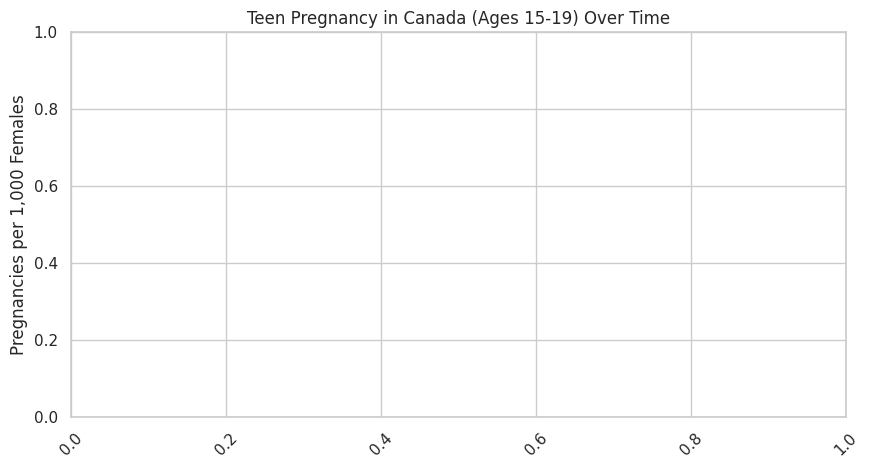

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Plot Teen Pregnancy over Years for Canada
canada_df = df[(df['Region'] == 'Canada') & (df['Outcome'] == 'Total teen pregnancies')]
plt.figure(figsize=(10, 5))
sns.lineplot(data=canada_df, x='Year', y='Value', hue='Characteristic', marker='o')
plt.title('Teen Pregnancy in Canada (Ages 15-19) Over Time')
plt.ylabel('Pregnancies per 1,000 Females')
plt.xticks(rotation=45)
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder

# Copy the cleaned data
ml_df = df.copy()

# Encode categorical columns
le = LabelEncoder()
ml_df['Region'] = le.fit_transform(ml_df['Region'])
ml_df['Outcome'] = le.fit_transform(ml_df['Outcome'])
ml_df['Characteristic'] = le.fit_transform(ml_df['Characteristic'])

In [10]:
# Features and target
X = ml_df[['Year', 'Region', 'Outcome', 'Characteristic']]
y = ml_df['Value']

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Train Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [13]:
# Predict
y_pred = model.predict(X_test)

# Evaluate
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

R² Score: 0.7120087301439262
RMSE: 1864.4355340981206
